In [1]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path
from CFDmodule import *
from readStep import *
from PIL import Image  
%matplotlib inline

In [2]:
#specify inout parameters here
gamma=5.0/3.0
g=1.0
Lz=3.2
waveLen = 0.4
Ly = waveLen
mu =1.13137E-4
rho_h = 1.35
rho_l = 0.65
CFDmethod = False
#####input done

In [3]:
###calculate some parameters
dz=dy=dx=Lz/nz

if nx == 1:
    dx=1.0
    
horizon_lim = (0, Ly-dy)
vert_lim = (0, Lz-dz)
extent=horizon_lim+vert_lim

FieldPoint = h5file.get('Fields').values()
totalsteps, specout = get_LatestTime(FieldPoint)

step = []
for i in range(totalsteps/specout):
    step.append(str((i+1)*specout).zfill(6))
    
istep = str(totalsteps).zfill(6)

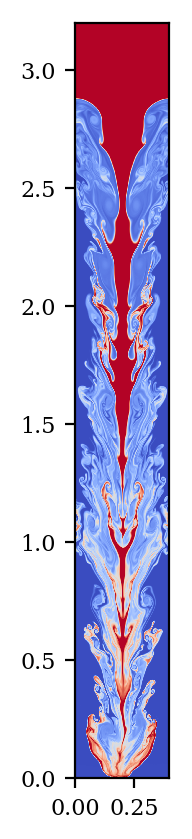

In [4]:
mylist = ['Fields/','Prho','/',istep]
filepath = delimiter.join(mylist)
databk = h5file.get(filepath)
rho = np.array(databk)
rho = np.transpose(rho)
rho = np.transpose(np.reshape(rho, (ny,nz)))

fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
plt.rc('font', family='serif', size=8)
plt.imshow(rho, origin='none', extent=horizon_lim+vert_lim, aspect=1,
           cmap='coolwarm',vmin=rho_l,vmax=rho_h)


In [5]:
##initil function for bub velocity
if CFDmethod == True:
    CFD_x = Create_matrix_fd2(nx) / dx
    CFD_y = Create_matrix_fd2(ny) / dy
    CFD_z = Create_matrix_fd2(nz) / dz

bub_loc_all = np.zeros(len(step))
bub_loc_all_ori = np.zeros(len(step))
sp_loc_all = np.zeros(len(step))
bub_velo_all = np.zeros(len(step))
bub_velo_all_aver = np.zeros(len(step))
sp_velo_all = np.zeros(len(step))
bub_velo_all_ori = np.zeros(len(step))

seq = 0

for istep in step:
    
    print "doing", float(istep)/totalsteps*100, "%"
    

    mylist = ['Fields/', 'Prho', '/', istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    np_data = np.array(databk)
    if nx == 1:
        m1 = (np_data[:, ny/2-1, 0] + np_data[:, ny/2, 0] )/2
    else:
        m1 = (np_data[:, ny/2-1, nx/2-1] + np_data[:, ny/2, nx/2] 
      + np_data[:, ny/2-1, nx/2] + np_data[:, ny/2, nx/2-1])/4.0
    m2 = np_data[:, 0, 0]
    m1_filter=m1.copy();    
    m2_filter=m2.copy();    
    for jstep in range(2,nz-3):
        m1_filter[jstep]=(m1[jstep-2]+m1[jstep-1]+m1[jstep]+m1[jstep+1]+m1[jstep+2])/5;
        m2_filter[jstep]=(m2[jstep-2]+m2[jstep-1]+m2[jstep]+m2[jstep+1]+m2[jstep+2])/5;


    m1_grad = high_order_gradient(m1_filter,dx,6)
    m2_grad = high_order_gradient(m2_filter,dx,6)


    sp_loc = np.argmax(m1_grad)
    bub_loc = np.argmax(m2_grad)

    sp_loc_all[seq] = sp_loc
    bub_loc_all[seq] = bub_loc

    mylist = ['Fields/', 'PVz', '/', istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    np_data = np.array(databk)

    #consider 2D/3D case
    if nx == 1:
        m1 = (np_data[:, ny/2-1, 0] + np_data[:, ny/2, 0] )/2
    else:
        m1 = (np_data[:, ny/2-1, nx/2-1] + np_data[:, ny/2, nx/2] 
      + np_data[:, ny/2-1, nx/2] + np_data[:, ny/2, nx/2-1])/4.0
    m2 = np_data[:, 0, 0]
    sp_velo = m1[sp_loc]
    bub_velo = m2[bub_loc]
    bub_velo_all[seq] = bub_velo
    sp_velo_all[seq] = sp_velo

    seq += 1


doing 1.19505010248 %
doing 2.39010020495 %
doing 3.58515030743 %
doing 4.7802004099 %
doing 5.97525051238 %
doing 7.17030061485 %
doing 8.36535071733 %
doing 9.5604008198 %
doing 10.7554509223 %
doing 11.9505010248 %
doing 13.1455511272 %
doing 14.3406012297 %
doing 15.5356513322 %
doing 16.7307014347 %
doing 17.9257515371 %
doing 19.1208016396 %
doing 20.3158517421 %
doing 21.5109018446 %
doing 22.705951947 %
doing 23.9010020495 %
doing 25.096052152 %
doing 26.2911022545 %
doing 27.4861523569 %
doing 28.6812024594 %
doing 29.8762525619 %
doing 31.0713026644 %
doing 32.2663527668 %
doing 33.4614028693 %
doing 34.6564529718 %
doing 35.8515030743 %
doing 37.0465531767 %
doing 38.2416032792 %
doing 39.4366533817 %
doing 40.6317034842 %
doing 41.8267535866 %
doing 43.0218036891 %
doing 44.2168537916 %
doing 45.4119038941 %
doing 46.6069539965 %
doing 47.802004099 %
doing 48.9970542015 %
doing 50.192104304 %
doing 51.3871544064 %
doing 52.5822045089 %
doing 53.7772546114 %
doing 54.9723047

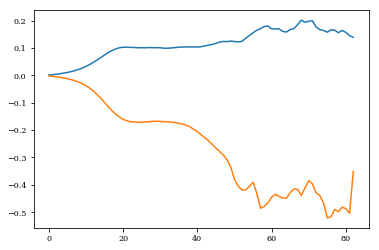

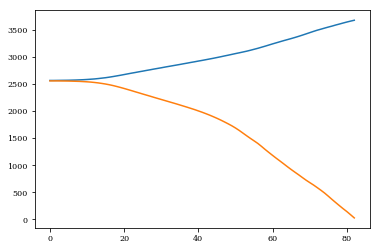

In [6]:
plt.plot(bub_velo_all)
plt.show()
plt.savefig('bubvel.eps', format='eps', dpi=300)
plt.clf()

plt.plot(sp_velo_all)
plt.show()
plt.savefig('spkvel.eps', format='eps', dpi=300)
plt.clf()

plt.plot(bub_loc_all)
plt.plot(sp_loc_all)
plt.savefig('loc.eps', format='eps', dpi=300)
plt.show()
plt.clf()